In [1]:
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans

In [3]:
df =pd.read_csv("sales_data_sample.csv",encoding="unicode_escape")

In [4]:
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [5]:
df = df[['QUANTITYORDERED', 'PRICEEACH', 'SALES']]

In [6]:
intertia = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df)
    intertia.append(kmeans.inertia_)

<Axes: >

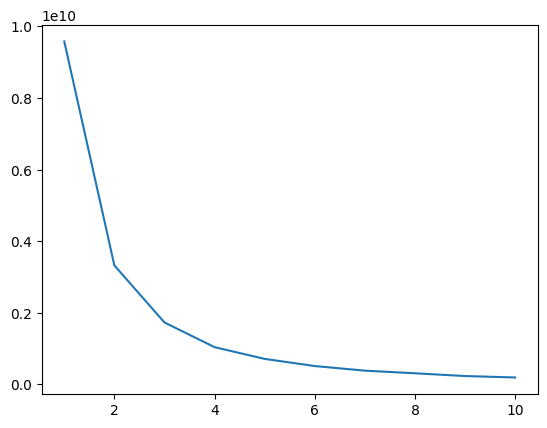

In [7]:
sns.lineplot(x=range(1, 11), y=intertia, )

In [8]:
# Optimal K = 4
kmeans = KMeans(n_clusters=4)
df['Cluster']  = kmeans.fit_predict(df)

In [9]:
df.head()

,QUANTITYORDERED,PRICEEACH,SALES,Cluster
0,30,95.70,2871.00,0
1,34,81.35,2765.90,0
2,41,94.74,3884.34,0
3,45,83.26,3746.70,0
4,49,100.00,5205.27,3


In [12]:
df['Cluster'].unique()

array([0, 3, 1, 2], dtype=int32)

In [13]:
df['Cluster'].value_counts()

,count
Cluster,
1,1076
0,1016
3,538
2,193
